## Nettoyage des données d'entrée

La société Assur'Aimant nous a fournit le data set suivant :

In [33]:
import pandas as pd
df = pd.read_csv("dataset.csv")

print(df.head(3))
print("...")
print(df.tail(3))
print()
print(f"{df.shape[0]} lignes, {df.shape[1]} colonnes" )

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620
...
      age     sex    bmi  children smoker     region     charges
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

1338 lignes, 7 colonnes


# 1. Vérification des données

Pour pouvoir exploiter ces données, la première chose que nous devons faire est de vérifier le contenu de chaque colonne
(valeurs manquantes, "erreurs") :

In [34]:
# Valeurs nulles ou qui ne sont pas des nombres
df.isna().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Aucune valeur manquante : ces données sont consistantes.

<Axes: >

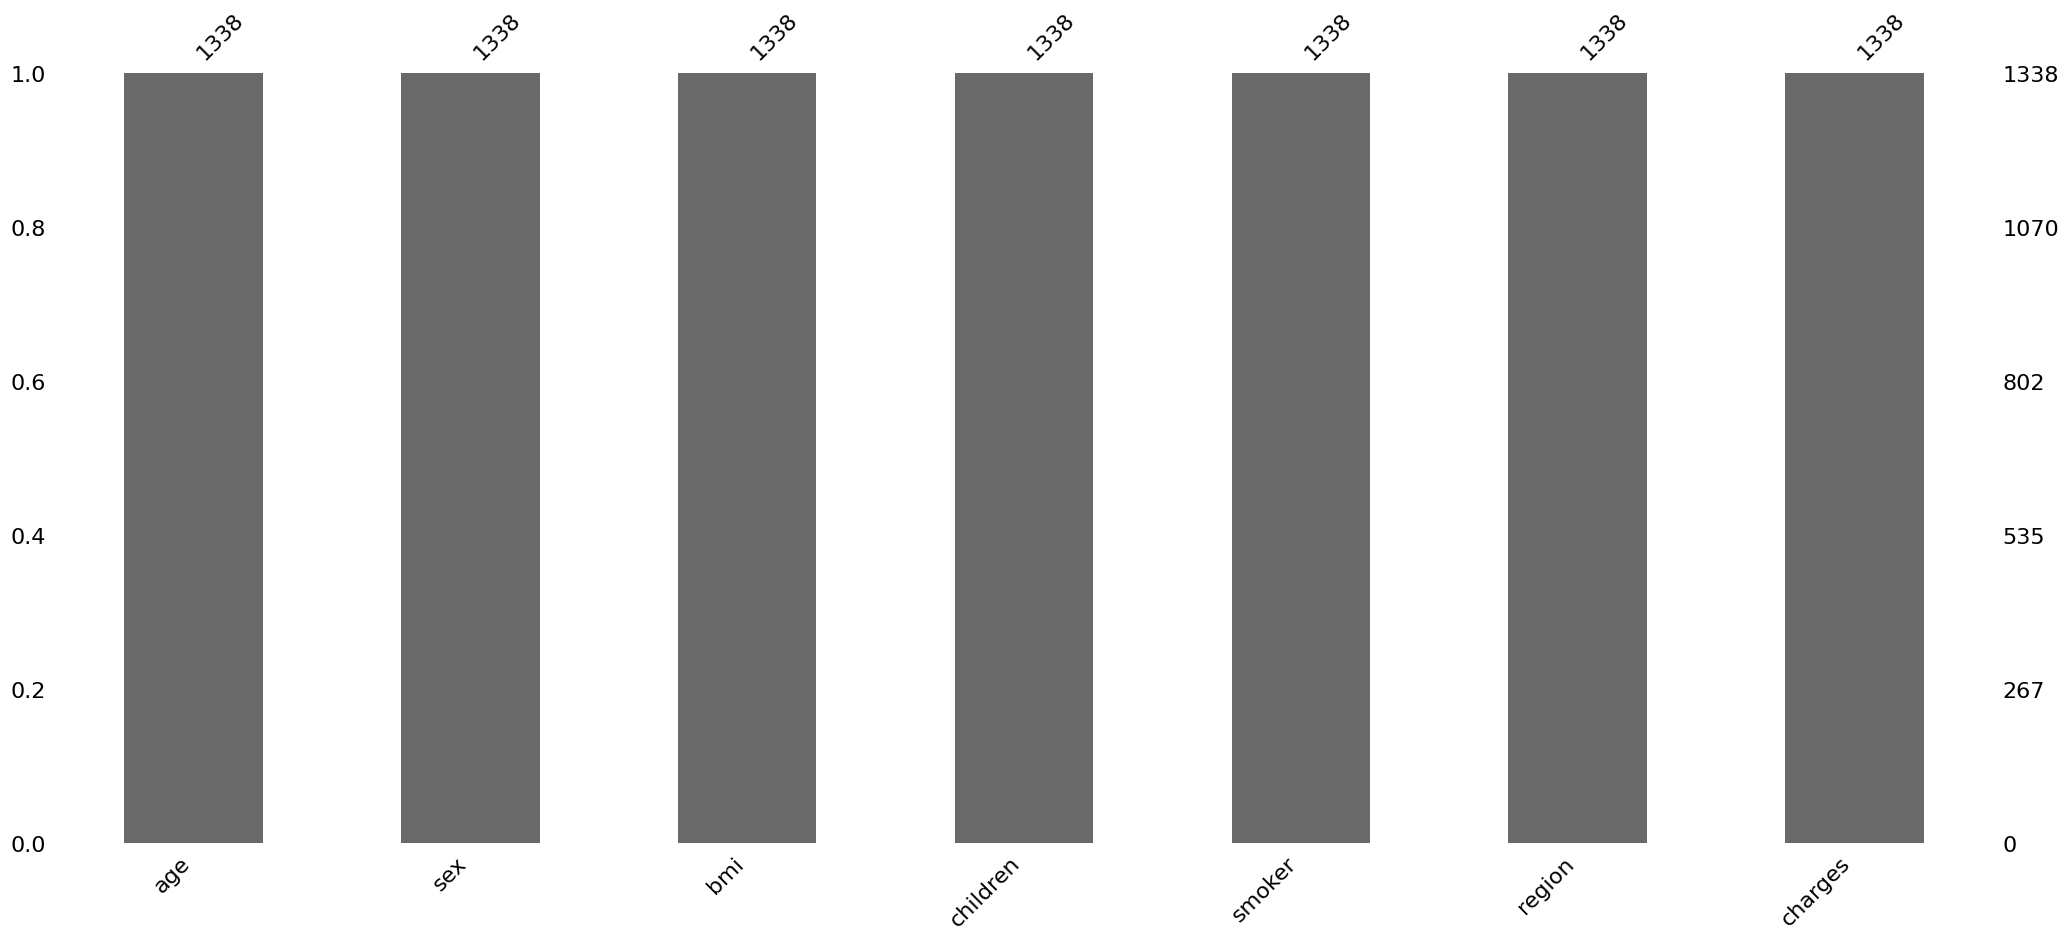

In [35]:
# possibilité d'utiliser l'outil missingno, sur recommandation de notre ancien formateur :
import missingno as msno

msno.bar(df)

On constate que chaque colonne contient le même nombre (1338) de valeurs et aucune valeur manquante

# 1.1. Données numériques continues
Pas de nettoyage spécifique pour les colonnes "age", "bmi", "charges". Nous verrons dans l'analyse et la modélisation quels traitement leur appliquer.

# 1.2. Autres données
Pour les données textuelles ou ordinales, nous devons vérifier l'ensemble des valeurs possibles :

In [36]:
tab = df["sex"].value_counts()
print(tab)
print(f"Total : {tab.sum()}")

sex
male      676
female    662
Name: count, dtype: int64
Total : 1338


Colonne sex : 2 valeurs possibles : male ou female, répartition équilibrée.

In [37]:
tab = df["children"].value_counts()
print(tab)
print(f"Total : {tab.sum()}")

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
Total : 1338


Colonne children : 6 valeurs possibles de 0 à 5 enfants.

In [38]:
tab = df["smoker"].value_counts()
print(tab)
print(f"Total : {tab.sum()}")

smoker
no     1064
yes     274
Name: count, dtype: int64
Total : 1338


Colonne smoker : 2 valeurs possibles : yes ou no.

In [39]:
tab = df["region"].value_counts()
print(tab)
print(f"Total : {tab.sum()}")

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Total : 1338


Colonne region : 4 valeurs possibles :  southeast, southwest, northwest ou northeast

# 2. Transformation des données en nombres : une première approche

Pour traiter les données nous utiliserons des tableaux numériques,
Pour pouvoir exploiter pleinement les données fournies nous avons besoin d'une donnée d'entrée exploitable :
Cette manipulation se fera par la suite en utilisant des méthodes "toutes faites" de la bibliothèque scikit-learn.
Voici néanmoins une première manière de faire la chose :

In [40]:
dataframe_exploitable = df.copy()
dataframe_exploitable["sex"] = df["sex"].apply( lambda x : 1 if x == "male" else 0)
dataframe_exploitable["smoker"] = df["smoker"].apply( lambda x : 1 if x == "yes" else 0)

def get_region_code(region :str) -> int :
    match region : 
        case "northeast" : return 1 
        case "northwest" : return 2
        case "southwest" : return 3
        case "southeast" : return 4
        case _ : raise Exception("It should not happen")

dataframe_exploitable["region"] = df["region"].apply( lambda x : get_region_code(x))

Nous verrons un peu plus loin comment mieux encoder sex, region.

In [41]:
print(dataframe_exploitable.head(3))
print("...")
print(dataframe_exploitable.tail(3))
print()
print(f"{dataframe_exploitable.shape[0]} lignes, {df.shape[1]} colonnes" )

   age  sex    bmi  children  smoker  region     charges
0   19    0  27.90         0       1       3  16884.9240
1   18    1  33.77         1       0       4   1725.5523
2   28    1  33.00         3       0       4   4449.4620
...
      age  sex    bmi  children  smoker  region     charges
1335   18    0  36.85         0       0       4   1629.8335
1336   21    0  25.80         0       0       3   2007.9450
1337   61    0  29.07         0       1       2  29141.3603

1338 lignes, 7 colonnes
